In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the train and test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [3]:
# Print 5 random rows from the test dataset
df_test.sample(n=5, replace=True)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
266,973,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,829,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,986,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,843,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Get description of the dataset within 1 and 99 percentile
def get_description(df):
    # Get description of the dataset
    description = df.describe(percentiles=[0.01, 0.99])
    return description

In [13]:
get_description(df_train)

               id  sudden_fever    headache  mouth_bleed  nose_bleed  \
count  707.000000    707.000000  707.000000   707.000000  707.000000   
mean   353.000000      0.503536    0.449788     0.459689    0.487977   
std    204.237607      0.500341    0.497825     0.498725    0.500209   
min      0.000000      0.000000    0.000000     0.000000    0.000000   
1%       7.060000      0.000000    0.000000     0.000000    0.000000   
50%    353.000000      1.000000    0.000000     0.000000    0.000000   
99%    698.940000      1.000000    1.000000     1.000000    1.000000   
max    706.000000      1.000000    1.000000     1.000000    1.000000   

       muscle_pain  joint_pain    vomiting        rash    diarrhea  ...  \
count   707.000000  707.000000  707.000000  707.000000  707.000000  ...   
mean      0.517680    0.449788    0.441301    0.487977    0.390382  ...   
std       0.500041    0.497825    0.496894    0.500209    0.488181  ...   
min       0.000000    0.000000    0.000000    0.000

In [14]:
get_description(df_test)

                id  sudden_fever    headache  mouth_bleed  nose_bleed  \
count   303.000000    303.000000  303.000000   303.000000  303.000000   
mean    858.000000      0.577558    0.462046     0.458746    0.504950   
std      87.612784      0.494765    0.499382     0.499120    0.500803   
min     707.000000      0.000000    0.000000     0.000000    0.000000   
1%      710.020000      0.000000    0.000000     0.000000    0.000000   
50%     858.000000      1.000000    0.000000     0.000000    1.000000   
99%    1005.980000      1.000000    1.000000     1.000000    1.000000   
max    1009.000000      1.000000    1.000000     1.000000    1.000000   

       muscle_pain  joint_pain    vomiting        rash    diarrhea  ...  \
count   303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean      0.531353    0.541254    0.488449    0.448845    0.458746  ...   
std       0.499842    0.499120    0.500693    0.498199    0.499120  ...   
min       0.000000    0.000000    0.000000

In [7]:
# Get the unique values in df_train prognosis
df_train["prognosis"].unique()

array(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'], dtype=object)

In [8]:
# Get the sum of each column nan in descending order.
df_train.isna().sum().sort_values(ascending=False)

id                   0
hyperpyrexia         0
slow_heart_rate      0
abdominal_pain       0
light_sensitivity    0
                    ..
gum_bleed            0
jaundice             0
coma                 0
diziness             0
prognosis            0
Length: 66, dtype: int64

In [9]:
df_test.isna().sum().sort_values(ascending=False)

id                   0
loss_of_appetite     0
slow_heart_rate      0
abdominal_pain       0
light_sensitivity    0
                    ..
gum_bleed            0
jaundice             0
coma                 0
diziness             0
bullseye_rash        0
Length: 65, dtype: int64

In [10]:
def plot_histograms(df, figsize=(20, 20), save_file=None):
    """
    Plot histograms of all columns in the dataframe.

    Args:
    df (pd.DataFrame): Input dataframe.
    figsize (tuple): Figure size in inches (width, height).
    save_file (str, optional): Filename to save the figure. Defaults to None.
    """
    # Plot all the columns in the dataframe as histograms
    df.hist(figsize=figsize)

    # Save the figure, if a filename is provided
    if save_file is not None:
        plt.savefig(save_file)

    # Show the figure
    plt.show()

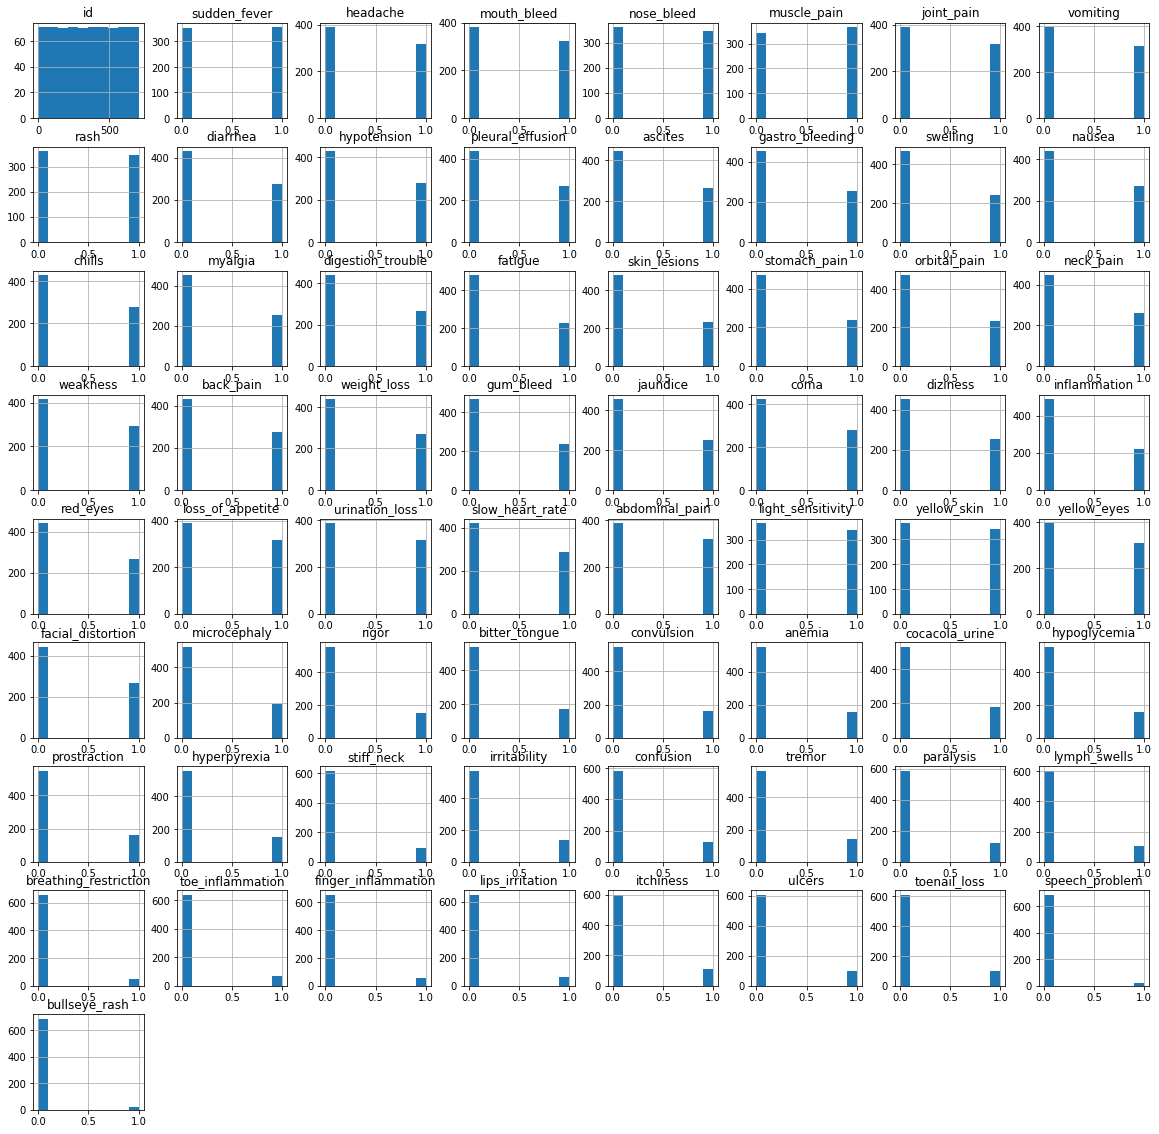

In [11]:
plot_histograms(df_train, save_file="train_histograms.png")

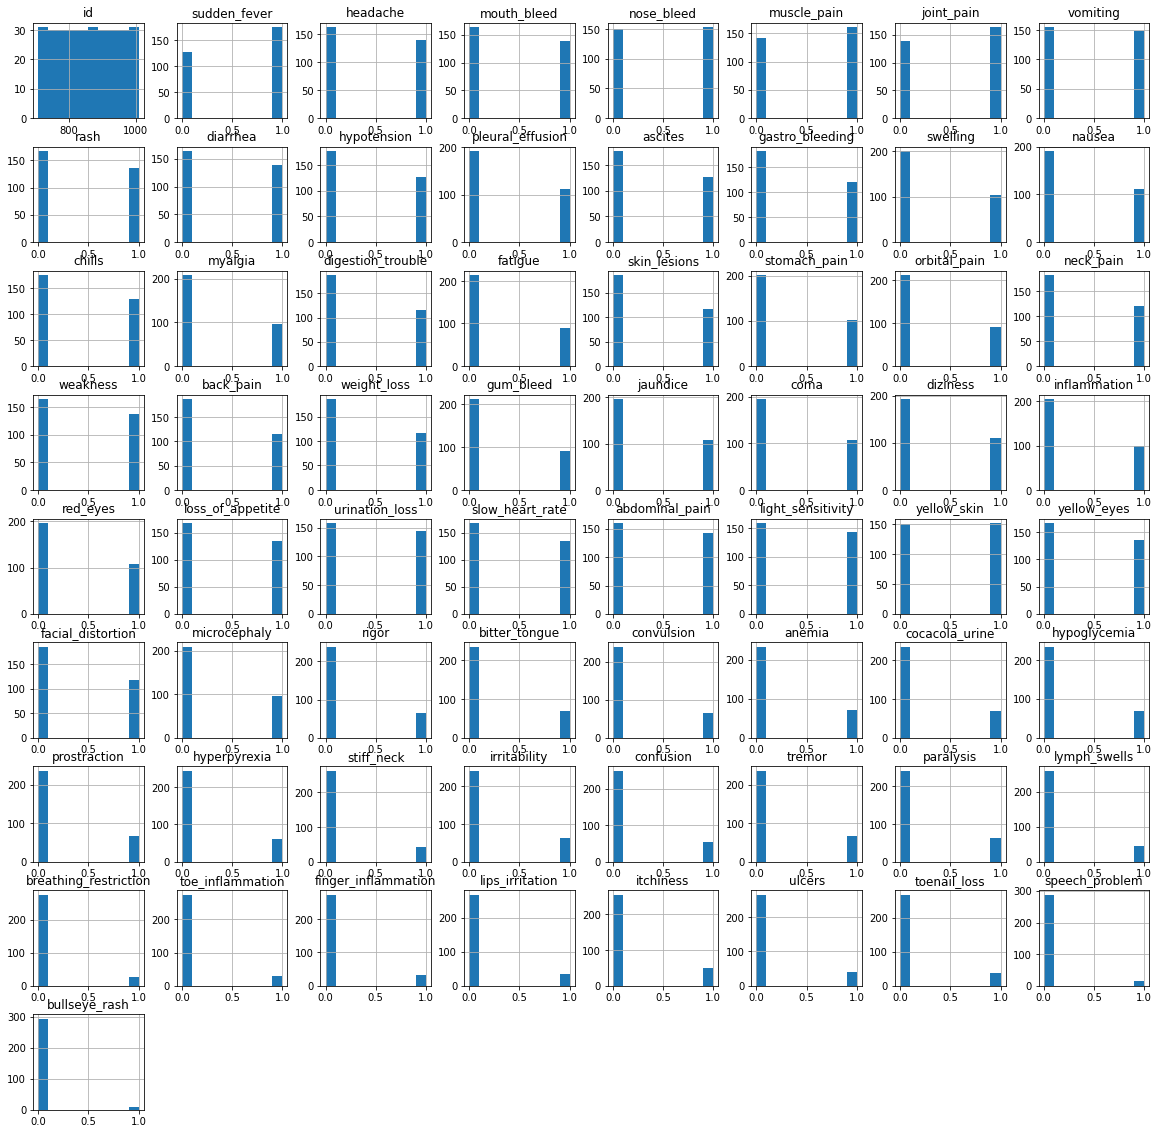

In [12]:
plot_histograms(df_test, save_file="test_histograms.png")

### OBSERVATION

1. For most features, the mean values are comparable between the train and test datasets. This indicates that the distribution of values for these features is similar across both datasets. Some variations are expected due to the randomness in splitting the data.

2. The standard deviations for most features are also similar between the train and test data, which means the spread of the data is consistent across both datasets.

3. Comparing the percentiles (1%, 50%, and 99%) across the train and test data, we can observe that the values are generally close to each other. This suggests that the overall distribution of the data is consistent between the train and test datasets.

In summary, based on the provided descriptive statistics, the train and test datasets seem to have comparable distributions for the features, making them suitable for training and evaluating a machine learning model.